# Notebook to summarize shurf model results

In [1]:
import pandas as pd
import numpy as np
import statistics

import xarray as xr
import CRPS.CRPS as pscore
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
# Paths
path = '/Users/havardhegre1/views-platform/views-models/models/'
model_list = [
    {'name': 'wild_rose',
    'stub': 'predictions_validation_20250408_164044_',
    'weight': 200}, 
    {'name': 'wuthering_heights',
    'stub': 'predictions_validation_20250410_074521_',
    'weight': 500},
    {'name': 'lovely_creature',
    'stub': 'predictions_validation_20250408_103715_',
    'weight': 500},
    {'name': 'fourtieth_symphony',
    'stub': 'predictions_validation_20250408_213359_',
    'weight': 100},
    {'name': 'cheap_thrills',
    'stub': 'predictions_validation_20250411_080754_',
    'weight': 100},
]
sequences = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']

number_of_sequences = len(sequences) # 12
#number_of_sequences = 1 # For testing

number_of_models = len(model_list) # 5
total_weight = sum([model['weight'] for model in model_list]) # 1600

for model in model_list:
    filename = f"{path}{model['name']}/data/generated/{model['stub']}"
#    print(model['name'], model['stub'], filename)
    model['seq_data'] = []
    for s in sequences[0:number_of_sequences]:
        df = pd.read_parquet(filename + f"{s}.parquet")
        try:
            df.rename(columns={'pred_ln_sb_best': 'pred_sb_best'}, inplace=True)
        except:
            pass
        df_dict = {
            'first_month': df.index[0][0],
            'last_month': df.index[-1][0],
            'samples': len(df.loc[df.index[0][0], 1].to_list()[0]),
            'data': df
        }
        print(model['name'], s, df_dict['first_month'], df_dict['last_month'], df_dict['samples'])
        model['seq_data'].append(df_dict)


wild_rose 00 445 480 200
wild_rose 01 446 481 200
wild_rose 02 447 482 200
wild_rose 03 448 483 200
wild_rose 04 449 484 200
wild_rose 05 450 485 200
wild_rose 06 451 486 200
wild_rose 07 452 487 200
wild_rose 08 453 488 200
wild_rose 09 454 489 200
wild_rose 10 455 490 200
wild_rose 11 456 491 200
wuthering_heights 00 445 480 500
wuthering_heights 01 446 481 500
wuthering_heights 02 447 482 500
wuthering_heights 03 448 483 500
wuthering_heights 04 449 484 500
wuthering_heights 05 450 485 500
wuthering_heights 06 451 486 500
wuthering_heights 07 452 487 500
wuthering_heights 08 453 488 500
wuthering_heights 09 454 489 500
wuthering_heights 10 455 490 500
wuthering_heights 11 456 491 500
lovely_creature 00 445 480 200
lovely_creature 01 446 481 200
lovely_creature 02 447 482 200
lovely_creature 03 448 483 200
lovely_creature 04 449 484 200
lovely_creature 05 450 485 200
lovely_creature 06 451 486 200
lovely_creature 07 452 487 200
lovely_creature 08 453 488 200
lovely_creature 09 454 48

In [3]:
config_hyperparameters = {
    'wild_rose': 'hyperparameters_20250408_164044.json',
    'wuthering_heights': 'hyperparameters_20250410_074521.json',
    'lovely_creature': 'hyperparameters_20250408_103715.json',
    'fourtieth_symphony': 'hyperparameters_20250408_213359.json',
    'cheap_thrills': 'hyperparameters_20250411_080754.json',
}
config_hyperparameters

{'wild_rose': 'hyperparameters_20250408_164044.json',
 'wuthering_heights': 'hyperparameters_20250410_074521.json',
 'lovely_creature': 'hyperparameters_20250408_103715.json',
 'fourtieth_symphony': 'hyperparameters_20250408_213359.json',
 'cheap_thrills': 'hyperparameters_20250411_080754.json'}

In [4]:
# Extract model characteristics
for model in model_list[0:-1]:
    filename = f"{path}{model['name']}/configs/config_hyperparameters.py"
    with open(filename, 'r') as file:
        lines = file.readlines()
    print(model['name'])
    print(lines[12:])
    filename = f"{path}{model['name']}/configs/config_meta.py"
    with open(filename, 'r') as file:
        lines = file.readlines()
    print(lines[12:])   

wild_rose
["        'submodels_to_train': 50,\n", "        'pred_samples': 10,\n", "        'log_target': False,\n", "        'draw_dist': 'Lognormal',\n", "        'draw_sigma': 0.5,\n", "        'geo_unit_samples': 1.0,\n", '        "parameters": {\n', '            "clf": {\n', "                'n_estimators': 2,\n", "                'max_depth': 4,\n", "                'subsample': 0.2,\n", "                'n_jobs': -2,\n", '            },\n', '            "reg": {\n', "                'n_estimators': 2,\n", "                'max_depth': 4,\n", "                'subsample': 0.2,\n", "                'n_jobs': -2,\n", '            }\n', '        }\n', '    }\n', '    return hyperparameters\n']
['        "targets": ["sb_best"],\n', '        "level": "cm",\n', '        "creator": "Håvard",\n', '        "model_reg": "XGBRegressor",\n', '        "model_clf": "XGBClassifier",\n', '        "metrics": ["RMSLE", "CRPS", "MSE"],\n', '        "queryset": "uncertainty_conflict_nolog",\n', '   

In [5]:
def check_setup(m, s, first_month=447, country=246, with_actuals=False):
    print(model_list[m]['name'])
    print('data:',model_list[m]['seq_data'][s]['data'].head(5))
    print('data.loc[first_month,country]:',model_list[m]['seq_data'][s]['data'].loc[first_month,country].head(5))
    if with_actuals:
        print('df_w_actuals:',model_list[m]['seq_data'][s]['df_w_actuals'].head(5))
        print('df_w_actuals.loc[first_month,country]:',model_list[m]['seq_data'][s]['df_w_actuals'].loc[first_month,country].head(5))


# Check this is correct
m = -1
s = number_of_sequences - 1
#check_setup(m, s, first_month=447, country=246, with_actuals=False)


# Smoothing predictions through a sampling process

In [83]:
def smoothing_matrix(steps, option = 0, samples = 1000, verbose=False):
    # Create a smoothing matrix
    smoothing_matrix = np.zeros((steps, steps))
    if option == 0:
        smoothing_matrix[0, 0:4] = [550, 250, 150, 50]
        smoothing_matrix[1, 0:5] = [200, 450, 200, 100, 50]
        smoothing_matrix[2, 0:6] = [50, 200, 400, 200, 100, 50]
        for i in range(3, steps-3):
            smoothing_matrix[i, i-3:i+4] = [50, 100, 200, 300, 200, 100, 50]
        smoothing_matrix[steps-3, steps-7:steps] = [50, 100, 200, 300, 200, 100, 50]
        smoothing_matrix[steps-2, steps-6:steps] = [50, 100, 150, 200, 300, 200]
        smoothing_matrix[steps-1, steps-5:steps] = [50, 100, 150, 250, 450]
        
    if option == 1:
        smoothing_matrix[0, 0:5] = [550, 200, 125, 75, 50]
        smoothing_matrix[1, 0:6] = [200, 350, 175, 125, 100, 50]
        smoothing_matrix[2, 0:8] = [100, 200, 325, 125, 100, 75, 50, 25]
        smoothing_matrix[3, 0:8] = [50, 100, 175, 325, 150, 100, 75, 25]
        for i in range(4, steps-4):
            smoothing_matrix[i, i-4:i+5] = [25, 75, 100, 150, 300, 150, 100, 75, 25]
        smoothing_matrix[steps-4, steps-9:steps] = [25, 75, 100, 150, 300, 150, 100, 75, 25]
        smoothing_matrix[steps-3, steps-8:steps] = [25, 50, 100, 125, 300, 150, 150, 100]
        smoothing_matrix[steps-2, steps-7:steps] = [25, 50, 75, 125, 175, 325, 225]
        smoothing_matrix[steps-1, steps-6:steps] = [25, 50, 100, 125, 275, 425]
    # Check rows and columns sum to 1000
    if verbose:
        for i in range(steps):
            if np.sum(smoothing_matrix[i, :]) != 1000:
                print('Horizontal check:', i, np.sum(smoothing_matrix[i, :]))
            if np.sum(smoothing_matrix[:, i]) != 1000:
                print('Vertical check:', i, np.sum(smoothing_matrix[:, i]))
    # Scale to samples
    smoothing_matrix = smoothing_matrix * (samples / 1000)
    return smoothing_matrix.astype(int)
    
sm = smoothing_matrix(36, option=1, samples = 500, verbose=True)
sm

Vertical check: 0 925.0
Vertical check: 1 950.0
Vertical check: 4 1050.0
Vertical check: 5 1025.0
Vertical check: 6 1025.0
Vertical check: 7 1025.0
Vertical check: 27 1025.0
Vertical check: 28 1075.0
Vertical check: 29 1075.0
Vertical check: 30 1125.0
Vertical check: 31 1200.0
Vertical check: 32 1025.0
Vertical check: 33 750.0
Vertical check: 34 925.0
Vertical check: 35 800.0


array([[275, 100,  62, ...,   0,   0,   0],
       [100, 175,  87, ...,   0,   0,   0],
       [ 50, 100, 162, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  75,  75,  50],
       [  0,   0,   0, ...,  87, 162, 112],
       [  0,   0,   0, ...,  62, 137, 212]])

In [80]:
sm
samples = 200
sm_r = sm*(samples/1000)
sm_r

array([[110.,  40.,  25., ...,   0.,   0.,   0.],
       [ 40.,  70.,  35., ...,   0.,   0.,   0.],
       [ 20.,  40.,  65., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  30.,  30.,  20.],
       [  0.,   0.,   0., ...,  35.,  65.,  45.],
       [  0.,   0.,   0., ...,  25.,  55.,  85.]])

In [8]:

def smooth_predictions(m, s, smoothing_matrix):
    ''' Smooth predictions for model m and sequence s by sampling from adjacent steps according to the smoothing matrix '''
    df = model_list[m]['seq_data'][s]['data']
    df['smoothed_predictions'] = None
    to_step = 0
    for to_month in df.index.get_level_values(0).unique():
#        print('smoothing month', to_month)
        for country in df.loc[to_month].index:
#            print('smoothing country', country)
            sampled_predictions = []
            for from_step in range(36):
                from_month = to_month - to_step + from_step
#                print('to_month:', to_month, 'to_step:', to_step, 'from_step:', from_step, 'from_month:', from_month, 'weight:', smoothing_matrix[to_step, from_step])
                sampled_predictions = sampled_predictions + np.random.choice(df.loc[from_month, country]['pred_sb_best'], smoothing_matrix[to_step, from_step], replace=True).tolist()
            df['smoothed_predictions'].loc[to_month, country] = sampled_predictions
        to_step += 1
    return df      

# Smooth predictions for model m and sequence s
#for model in model_list[0:1]:
#    for s in range(1):
for model in model_list[0:number_of_models]:
    for s in range(number_of_sequences):
        print('Smoothing model', model['name'], 'sequence', s)
        sm = smoothing_matrix(36, option=1)
        model['seq_data'][s]['data'] = smooth_predictions(model_list.index(model), s, sm)
#        print(model['seq_data'][s]['data'].head(5))

Smoothing model wild_rose sequence 0
Smoothing model wild_rose sequence 1
Smoothing model wild_rose sequence 2
Smoothing model wild_rose sequence 3
Smoothing model wild_rose sequence 4
Smoothing model wild_rose sequence 5
Smoothing model wild_rose sequence 6
Smoothing model wild_rose sequence 7
Smoothing model wild_rose sequence 8
Smoothing model wild_rose sequence 9
Smoothing model wild_rose sequence 10
Smoothing model wild_rose sequence 11
Smoothing model wuthering_heights sequence 0
Smoothing model wuthering_heights sequence 1
Smoothing model wuthering_heights sequence 2
Smoothing model wuthering_heights sequence 3
Smoothing model wuthering_heights sequence 4
Smoothing model wuthering_heights sequence 5
Smoothing model wuthering_heights sequence 6
Smoothing model wuthering_heights sequence 7
Smoothing model wuthering_heights sequence 8
Smoothing model wuthering_heights sequence 9
Smoothing model wuthering_heights sequence 10
Smoothing model wuthering_heights sequence 11
Smoothing mo

In [9]:
# checking results for smoothing the predictions
m = 0
s = number_of_sequences - 1
month = 445 + s
country = 246

print(model_list[m]['seq_data'][s]['data'].tail(5))
print('originals')
print('length',len(model_list[m]['seq_data'][s]['data'].loc[month, country]['pred_sb_best']))
print('mean',np.mean(model_list[m]['seq_data'][s]['data'].loc[month, country]['pred_sb_best']))
print('sd',statistics.stdev(model_list[m]['seq_data'][s]['data'].loc[month, country]['pred_sb_best']))
print('smoothed')
print('length',len(model_list[m]['seq_data'][s]['data'].loc[month, country]['smoothed_predictions']))
print('mean',np.mean(model_list[m]['seq_data'][s]['data'].loc[month, country]['smoothed_predictions']))
print('sd',statistics.stdev(model_list[m]['seq_data'][s]['data'].loc[month, country]['smoothed_predictions']))

                                                          pred_sb_best  \
month_id country_id                                                      
491      242         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         243         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         244         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         245         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         246         [26.0, 29.0, 64.0, 38.0, 20.0, 34.0, 35.0, 31....   

                                                  smoothed_predictions  
month_id country_id                                                     
491      242         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         243         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         244         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         245         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         246         [128.0, 80.0, 124.0, 1

# Ensemble

In [10]:
model_list[0]['seq_data'][0]['data']

pred_sb_best  \
month_id country_id                                                      
445      1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         2           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         3           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         4           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         5           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                                ...   
480      242         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         243         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         244         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         245         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
         246         [45.0, 34.0, 48.0, 39.0, 39.0, 70.0, 43.0, 38....   

                                                  smoothed_predictions  
month_id country_id                                                     
445      1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         2           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         3           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         4           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         5           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
...                                                                ...  
480      242         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         243         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         244         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         245         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
         246         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[6876 rows x 2 columns]

In [ ]:
# Compute the ensemble predictions

for predictions in ['pred_sb_best', 'smoothed_predictions']:
#for predictions in ['smoothed_predictions']:
    if predictions == 'pred_sb_best':
        ensemble_name = 'ensemble_raw'
    else:
        ensemble_name = 'ensemble_smoothed'
    print('Computing ensemble for', predictions, ensemble_name)

    ensemble_dict = {
        'stub': '',
        'weight': 1000,        
    }
    ensemble_data = []

#    for s in range(len(sequences)):
    for s in range(number_of_sequences):
        m = 0
        for model in model_list[0:number_of_models]:
            df_dict = {
                'first_month': model['seq_data'][s]['first_month'],
                'last_month': model['seq_data'][s]['last_month'],
                'samples': model['weight'],
            }
#            print(model['seq_data'][s]['data'].tail(5))
            df = pd.DataFrame(model['seq_data'][s]['data'][predictions]).copy()
            print('Orginal:', len(df.loc[480,246][predictions]), np.mean(df.loc[480,246][predictions]),df.tail(1))
#            print(predictions)
            df = df.explode(predictions, ignore_index=False)
#            print('Exploded:',df.tail(3))
            df.reset_index(inplace=True)
#            print(df.tail(3))
            df['draw'] = df.groupby(['month_id','country_id',predictions]).cumcount()
            df.set_index(['month_id','country_id','draw'], inplace=True)
            df.sort_index(inplace=True)
            df = df.loc[:, :, 0:model['weight']-1] # keep only as many draws as weight
            df.reset_index(inplace=True)
            df_imploded = df.groupby(['month_id', 'country_id'])[predictions].apply(lambda x: x.tolist()).reset_index()
            df_imploded.set_index(['month_id', 'country_id'], inplace=True)
            df = df_imploded
#            print('Exploded:', len(df.loc[480,246][predictions]), np.mean(df.loc[480,246][predictions]),df.tail(1))

            print(m, model['name'], model['weight'], s, model['seq_data'][s]['first_month'])
            
            if m == 0:
                ensemble_df = df
            else:
                ensemble_df[predictions] = ensemble_df[predictions] + df[predictions]
            print('Ensemble:', len(ensemble_df.loc[480,246][predictions]), np.mean(ensemble_df.loc[480,246][predictions]),ensemble_df.tail(1))
            
            m+=1
    #    print(ensemble_df.loc[447,246].head(5))
        if predictions == 'smoothed_predictions':
            ensemble_df.rename(columns={'smoothed_predictions': 'pred_sb_best'}, inplace=True)
        df_dict['data'] = ensemble_df
        ensemble_data.append(df_dict)
        

    ensemble_dict = {
        'name': ensemble_name,
        'stub': '',
        'weight': 1000,
        'seq_data': ensemble_data
    }
    print(ensemble_dict['name'], len(ensemble_dict['seq_data']))
    model_list.append(ensemble_dict)

Computing ensemble for pred_sb_best ensemble_raw
Orginal: 200 49.5                                                           pred_sb_best
month_id country_id                                                   
480      246         [45.0, 34.0, 48.0, 39.0, 39.0, 70.0, 43.0, 38....
0 wild_rose 200 0 445
Ensemble: 200 49.5                                                           pred_sb_best
month_id country_id                                                   
480      246         [45.0, 34.0, 48.0, 39.0, 70.0, 43.0, 38.0, 51....
Orginal: 500 60.904                                                           pred_sb_best
month_id country_id                                                   
480      246         [53.0, 116.0, 54.0, 80.0, 26.0, 103.0, 58.0, 2...
1 wuthering_heights 500 0 445
Ensemble: 700 57.645714285714284                                                           pred_sb_best
month_id country_id                                                   
480      246         [45.0, 

In [12]:
for m in [5,6]:
    print(model_list[m]['seq_data'][s]['data'].loc[480,246])
    print('Length:', len(model_list[m]['seq_data'][s]['data'].loc[480,246]['pred_sb_best']))
    print(np.mean(model_list[m]['seq_data'][s]['data'].loc[480,246]['pred_sb_best']))



pred_sb_best    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: (480, 246), dtype: object
Length: 1300
8.93923076923077
pred_sb_best    [40.0, 15.0, 69.0, 10.0, 59.0, 92.0, 49.0, 61....
Name: (480, 246), dtype: object
Length: 3523
231.38262844166903


In [13]:
for model in model_list:
    print(model['name'])

wild_rose
wuthering_heights
lovely_creature
fourtieth_symphony
cheap_thrills
ensemble_raw
ensemble_smoothed


In [15]:

# Check this is correct
m = -1
s = number_of_sequences
#check_setup(m, s, first_month=447, country=246, with_actuals=False)


# Extract actuals

In [16]:
# Running from PRIO:
!viewser config set REMOTE_URL https://viewser.viewsforecasting.org
# Running from Uppsala:

REMOTE_URL: https://viewser.viewsforecasting.org


In [17]:
# First and last months
first_month = model_list[-1]['seq_data'][0]['first_month']
last_month = model_list[-1]['seq_data'][-1]['last_month']
print(first_month, last_month, last_month - first_month)

445 491 46


In [18]:

from viewser.operations import fetch
from viewser import Queryset, Column
def countrydata():
    qs = (Queryset("country_data_for_evaluation", "country_month")
    .with_column(Column("country_name",from_loa="country",from_column="name"))
    .with_column(Column("isonum",from_loa="country",from_column="isonum"))
    .with_column(Column("isoab",from_loa="country",from_column="isoab"))
    .with_column(Column('sb_best', from_loa='country_month', from_column='ged_sb_best_sum_nokgi')
        .transform.missing.fill()
        .transform.missing.replace_na()
        )
    )
    data = qs.publish().fetch()
    return(data)



actuals_df = countrydata().loc[first_month:last_month, :]
actuals_df

Queryset country_data_for_evaluation read successfully 


country_name  isonum isoab  sb_best
month_id country_id                                            
445      1                        Guyana     328   GUY        0
         2                      Suriname     740   SUR        0
         3           Trinidad and Tobago     780   TTO        0
         4                     Venezuela     862   VEN        0
         5                         Samoa     882   WSM        0
...                                  ...     ...   ...      ...
491      242                    Tanzania     834   TZA        0
         243                     Morocco     504   MAR        2
         244                  Mauritania     478   MRT        0
         245                       Sudan     729   SDN        0
         246                 South Sudan     728   SSD       11

[8977 rows x 4 columns]

# Evaluation

In [19]:

def crps(predictions, actual):
    crps,fcrps,acrps =  pscore(predictions, actual).compute()
    return crps

def winkler_interval_score(y_true, y_lower, y_upper, alpha):
    """
    Calculates the Winkler Interval Score for a single observation.

    Args:
        y_true (float): The true observed value.
        y_lower (float): The lower bound of the prediction interval.
        y_upper (float): The upper bound of the prediction interval.
        alpha (float): 1 - coverage level (e.g., 0.1 for 90% coverage).

    Returns:
        float: The Winkler Interval Score.
    """
    if y_true < y_lower:
        return (y_upper - y_lower) + (2 / alpha) * (y_lower - y_true)
    elif y_true > y_upper:
        return (y_upper - y_lower) + (2 / alpha) * (y_true - y_upper)
    else:
        return (y_upper - y_lower)
    

def brier_score(predictions, actual, threshold):
    """
    Calculate the Brier Score for binary events.

    Args:
        predictions (list or np.array): Predicted probabilities for the event.
        actual (list or np.array): Actual binary outcomes (0 or 1).
        threshold (float): Probability threshold to classify an event as 1.

    Returns:
        float: The Brier Score.
    """
    predictions = np.array(predictions)
    actual_above_threshold = (actual >= threshold)
    # Apply threshold to predictions
    
    binary_predictions = (predictions >= threshold).sum() / len(predictions)
    # Calculate Brier Score
    return (binary_predictions - actual_above_threshold) ** 2


def categorize_fatalities(predlist):
    bins = [0,1,10,100,1000,10000] # Define bin edges
    counts, _ = np.histogram(predlist, bins=bins)
    proportions = counts / counts.sum()
    mode = statistics.mode(predlist)
    # Create labels for the bins
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    #return counts.tolist(), proportions.tolist(), len(predlist), mode, labels
    return mode, proportions.tolist()


In [20]:
actuals_df.describe()

,isonum,sb_best
count,8977.000000,8977.000000
mean,430.141361,25.655230
std,255.412111,199.238479
min,0.000000,0.000000
25%,204.000000,0.000000
50%,426.000000,0.000000
75%,659.000000,0.000000
max,894.000000,5991.000000


In [21]:
actuals_df.loc[actuals_df['sb_best'] > 0].describe()

,isonum,sb_best
count,1384.000000,1384.000000
mean,474.467486,166.406792
std,278.649037,483.939433
min,4.000000,1.000000
25%,180.000000,5.000000
50%,508.000000,24.000000
75%,729.000000,78.000000
max,887.000000,5991.000000


In [22]:
# Data for ensemble and all models

bands = [80, 90, 95, 98]
percentiles_list = []
for b in bands:
    p_low = (100 - b) / 2
    p_high = 100 - p_low
    percentiles_list.append(p_low)
    percentiles_list.append(p_high)
    
for model in model_list:
    print(model['name'])
    for s in range(number_of_sequences):
        print('Sequence:', s)
        df = model['seq_data'][s]['data']
        # merge with actuals    
        model['seq_data'][s]['df_w_actuals'] = df.merge(actuals_df, left_index=True, right_on=['month_id', 'country_id'], how='left')
        # Compute crps
        model['seq_data'][s]['df_w_actuals']['crps'] = model['seq_data'][s]['df_w_actuals'].apply(lambda row: crps(row['pred_sb_best'], row['sb_best']), axis=1)
        # Compute percentiles and coverage
        model['seq_data'][s]['df_w_actuals']['percentiles'] = model['seq_data'][s]['df_w_actuals'].apply(lambda row: np.percentile(row['pred_sb_best'], percentiles_list), axis=1)
        # Compute mean prediction
        model['seq_data'][s]['df_w_actuals']['mean_pred'] = model['seq_data'][s]['df_w_actuals'].apply(lambda row: np.mean(row['pred_sb_best']), axis=1)
        i = 0
        # Prediction intervals, coverage and Winkler score
        for b in bands:
            col = f'lower_{str(b)}'
            model['seq_data'][s]['df_w_actuals'][col] =model['seq_data'][s]['df_w_actuals'].apply(lambda row: np.percentile(row['pred_sb_best'], percentiles_list[i]), axis=1)
            i = i + 1
            col = f'higher_{str(b)}'
            model['seq_data'][s]['df_w_actuals'][col] =model['seq_data'][s]['df_w_actuals'].apply(lambda row: np.percentile(row['pred_sb_best'], percentiles_list[i]), axis=1)
            i = i + 1
            model['seq_data'][s]['df_w_actuals'][f'coverage_{str(b)}'] = model['seq_data'][s]['df_w_actuals'].apply(lambda row: 1 if (row['sb_best'] >= row[f'lower_{str(b)}']) & (row['sb_best'] <= row[f'higher_{str(b)}']) else 0, axis=1)
            model['seq_data'][s]['df_w_actuals'][f'winkler_{str(b)}'] = model['seq_data'][s]['df_w_actuals'].apply(lambda row: winkler_interval_score(row['sb_best'], row[f'lower_{str(b)}'], row[f'higher_{str(b)}'], (1 - b/100)), axis=1)
            model['seq_data'][s]['df_w_actuals']['mse'] = model['seq_data'][s]['df_w_actuals'].apply(lambda row: mean_squared_error([row['sb_best']], [np.mean(row['pred_sb_best'])]), axis=1)
        # Categorize fatalities,  thresholds 1, 10, 100, 1000, 10000, and add mode and proportions to dataframe
        model['seq_data'][s]['df_w_actuals']['fatality_categories'] = model['seq_data'][s]['df_w_actuals'].apply(lambda row: categorize_fatalities(row['pred_sb_best'])[1], axis=1)
        model['seq_data'][s]['df_w_actuals']['categories_mode'] = model['seq_data'][s]['df_w_actuals'].apply(lambda row: categorize_fatalities(row['pred_sb_best'])[0], axis=1)
        # Brier scores for thresholds 1, 10, 100, 1000, 10000
        for threshold in [1, 10, 100, 1000, 10000]:
            model['seq_data'][s]['df_w_actuals'][f'brier_{str(threshold)}'] = model['seq_data'][s]['df_w_actuals'].apply(lambda row: brier_score(row['pred_sb_best'], row['sb_best'], threshold), axis=1)
        # Mean scores over all months and countries
        model['seq_data'][s]['mean_crps'] = model['seq_data'][s]['df_w_actuals']['crps'].mean()
        model['seq_data'][s]['mean_mse'] = model['seq_data'][s]['df_w_actuals']['mse'].mean()
        for b in bands:
            model['seq_data'][s][f'mean_coverage_{str(b)}'] = model['seq_data'][s]['df_w_actuals'][f'coverage_{str(b)}'].mean()
            model['seq_data'][s][f'mean_coverage_nonzeros_{str(b)}'] = model['seq_data'][s]['df_w_actuals'].loc[model['seq_data'][s]['df_w_actuals']['sb_best'] > 0, f'coverage_{str(b)}'].mean()
            model['seq_data'][s][f'mean_winkler_{str(b)}'] = model['seq_data'][s]['df_w_actuals'][f'winkler_{str(b)}'].mean()
        for threshold in [1, 10, 100, 1000, 10000]:
            model['seq_data'][s][f'mean_brier_{str(threshold)}'] = model['seq_data'][s]['df_w_actuals'][f'brier_{str(threshold)}'].mean()
        print('  mean_crps:', model['seq_data'][s]['mean_crps'])
        # Mean scores by country:
        scores = ['sb_best','crps', 'mse', 'coverage_80', 'coverage_90', 'coverage_95', 'coverage_98', 'winkler_80', 'winkler_90', 'winkler_95', 'winkler_98', 'brier_1', 'brier_10', 'brier_100', 'brier_1000', 'brier_10000','mean_pred']
        model['seq_data'][s]['country_means'] = model['seq_data'][s]['df_w_actuals'][scores].groupby('country_id').mean()
    # Mean scores over all sequences
    model['mean_crps'] = np.mean([model['seq_data'][s]['mean_crps'] for s in range(number_of_sequences)])
    model['mean_mse'] = np.mean([model['seq_data'][s]['mean_mse'] for s in range(number_of_sequences)])
    for b in bands:
        model[f'mean_coverage_{str(b)}'] = np.mean([model['seq_data'][s][f'mean_coverage_{str(b)}'] for s in range(number_of_sequences)])
        model[f'mean_coverage_nonzeros_{str(b)}'] = np.mean([model['seq_data'][s][f'mean_coverage_nonzeros_{str(b)}'] for s in range(number_of_sequences)])
        model[f'mean_winkler_{str(b)}'] = np.mean([model['seq_data'][s][f'mean_winkler_{str(b)}'] for s in range(number_of_sequences)])
    for threshold in [1, 10, 100, 1000, 10000]:
        model[f'mean_brier_{str(threshold)}'] = np.mean([model['seq_data'][s][f'mean_brier_{str(threshold)}'] for s in range(number_of_sequences)])
    model['mean_pred'] = np.mean([model['seq_data'][s]['df_w_actuals']['mean_pred'].mean() for s in range(number_of_sequences)])
    print('Overall mean_crps:', model['mean_crps'])
            


wild_rose
Sequence: 0
  mean_crps: 18.67313505308319
Sequence: 1
  mean_crps: 17.119420571553228
Sequence: 2
  mean_crps: 19.029570433391505
Sequence: 3
  mean_crps: 18.819202268760908
Sequence: 4
  mean_crps: 17.750309660413034
Sequence: 5
  mean_crps: 16.997008333333333
Sequence: 6
  mean_crps: 17.97572705061082
Sequence: 7
  mean_crps: 18.157086663757998
Sequence: 8
  mean_crps: 17.929576614310648
Sequence: 9
  mean_crps: 18.380206184554975
Sequence: 10
  mean_crps: 18.033836067481094
Sequence: 11
  mean_crps: 19.28038638379872
Overall mean_crps: 18.178788773754118
wuthering_heights
Sequence: 0
  mean_crps: 18.652560915648632
Sequence: 1
  mean_crps: 19.22485407213496
Sequence: 2
  mean_crps: 20.043395528214074
Sequence: 3
  mean_crps: 19.05866870796975
Sequence: 4
  mean_crps: 20.38646740837697
Sequence: 5
  mean_crps: 20.617843688772542
Sequence: 6
  mean_crps: 21.360258511925537
Sequence: 7
  mean_crps: 19.391713224549157
Sequence: 8
  mean_crps: 18.60131335543921
Sequence: 9
  m

In [23]:
model['seq_data'][0]['mean_crps']


14.816751521388609

In [ ]:
import statistics
s= number_of_sequences - 1
month = 445 + s
predlist = model['seq_data'][1]['df_w_actuals'].loc[month,246]['pred_sb_best']


print(categorize_fatalities(predlist)[1])



In [ ]:
model['seq_data'][s]['df_w_actuals'].columns

In [24]:
df = model['seq_data'][s]['df_w_actuals']
df = df[df['sb_best']>0]
cols = ['country_name', 'sb_best','mean_pred','fatality_categories','categories_mode','crps','lower_90','higher_90','coverage_90']
df[cols].tail(20)


country_name  sb_best   mean_pred  \
month_id country_id                                     
491      96               Turkey        6   39.501654   
         117             Ukraine        6   30.673878   
         120             Somalia       84   56.400226   
         124               Yemen      316   64.017209   
         125             Armenia        4    0.000000   
         126          Azerbaijan     5991    0.000000   
         128                Iran        4    1.950145   
         133         Afghanistan     2247  447.215349   
         136            Pakistan       46   70.250465   
         145         Philippines       22   59.813953   
         149             Myanmar        4   17.305926   
         162          Mozambique       94    0.000000   
         167          Congo, DRC       49   67.392326   
         214                Chad        5    0.000000   
         220               Syria      198  111.712189   
         222               Egypt        6   48.733256   
         223               India       58   52.384419   
         237               Kenya        2   26.926520   
         243             Morocco        2    0.000000   
         246         South Sudan       11   22.007339   

                                                   fatality_categories  \
month_id country_id                                                      
491      96          [0.20014177693761814, 0.16824196597353497, 0.5...   
         117         [0.23076923076923078, 0.19043803418803418, 0.5...   
         120         [0.2182023742227247, 0.18117580553985302, 0.39...   
         124         [0.046511627906976744, 0.040697674418604654, 0...   
         125                                 [1.0, 0.0, 0.0, 0.0, 0.0]   
         126                                 [1.0, 0.0, 0.0, 0.0, 0.0]   
         128         [0.927536231884058, 0.002898550724637681, 0.06...   
         133         [0.046511627906976744, 0.019302325581395347, 0...   
         136         [0.046511627906976744, 0.050930232558139533, 0...   
         145         [0.04674418604651163, 0.1827906976744186, 0.65...   
         149         [0.4536433229373405, 0.13892826764956054, 0.39...   
         162                                 [1.0, 0.0, 0.0, 0.0, 0.0]   
         167         [0.04790697674418604, 0.1758139534883721, 0.54...   
         214                                 [1.0, 0.0, 0.0, 0.0, 0.0]   
         220         [0.16568047337278108, 0.02650887573964497, 0.3...   
         222         [0.10302325581395348, 0.14488372093023255, 0.6...   
         223         [0.046511627906976744, 0.13116279069767442, 0....   
         237         [0.2527813712807245, 0.23932729624838292, 0.46...   
         243                                 [1.0, 0.0, 0.0, 0.0, 0.0]   
         246         [0.5137614678899083, 0.03706422018348624, 0.42...   

                     categories_mode         crps  lower_90  higher_90  \
month_id country_id                                                      
491      96                      0.0    14.797424      0.00     117.00   
         117                     0.0     9.867464      0.00     107.00   
         120                     0.0    25.693693      0.00     181.15   
         124                     0.0   224.527409      5.00     163.05   
         125                     0.0     4.000000      0.00       0.00   
         126                     0.0  5991.000000      0.00       0.00   
         128                     0.0     3.514655      0.00      16.00   
         133                     0.0  1603.042493      5.95    1684.10   
         136                     0.0    11.575210      4.00     214.00   
         145                     0.0    14.553700      1.00     150.00   
         149                     0.0     5.058730      0.00      66.70   
         162                     0.0    94.000000      0.00       0.00   
         167                     0.0    13.869485      1.00     194.05   
         214              

## Presenting results

In [25]:
def print_scores(name, context, mean_pred, mean_crps, mean_mse, mean_coverage_80, mean_coverage_90, mean_coverage_95, mean_coverage_98, mean_coverage_nonzeros_80, mean_coverage_nonzeros_90, mean_coverage_nonzeros_95, mean_coverage_nonzeros_98, mean_winkler_80, mean_winkler_90, mean_winkler_95, mean_winkler_98, mean_brier_1, mean_brier_10, mean_brier_100, mean_brier_1000, mean_brier_10000):
    print(f"Model: {name}, {context}")
    print(f"CRPS={mean_crps:.2f}, MSE={mean_mse:.0f}, Mean prediction={mean_pred:.2f}")
    print(f"Coverage 80%={mean_coverage_80:.3f},  90%={mean_coverage_90:.3f}, 95%={mean_coverage_95:.3f}, 98%={mean_coverage_98:.3f}")
    print(f"Coverage non-zeros 80%={mean_coverage_nonzeros_80:.3f},  90%={mean_coverage_nonzeros_90:.3f}, 95%={mean_coverage_nonzeros_95:.3f}, 98%={mean_coverage_nonzeros_98:.3f}")
    print(f"Winkler 80%={mean_winkler_80:.1f}, 90%={mean_winkler_90:.1f}, 95%={mean_winkler_95:.1f}, 98%={mean_winkler_98:.1f}")
    print(f"Brier 1={mean_brier_1:.3f}, 10={mean_brier_10:.3f}, 100={mean_brier_100:.3f}, 1000={mean_brier_1000:.4f}, 10000={mean_brier_10000:.4f}")
    print(80*'-')
    
print(80*'-')
for model in model_list:
    print_scores(model['name'], 'All country months and sequences', model['mean_pred'], model['mean_crps'], model['mean_mse'], model['mean_coverage_80'], model['mean_coverage_90'], model['mean_coverage_95'], model['mean_coverage_98'],  model['mean_coverage_nonzeros_80'], model['mean_coverage_nonzeros_90'], model['mean_coverage_nonzeros_95'], model['mean_coverage_nonzeros_98'], model['mean_winkler_80'], model['mean_winkler_90'], model['mean_winkler_95'], model['mean_winkler_98'], model['mean_brier_1'], model['mean_brier_10'], model['mean_brier_100'], model['mean_brier_1000'], model['mean_brier_10000'])


--------------------------------------------------------------------------------
Model: wild_rose, All country months and sequences
CRPS=18.18, MSE=42030, Mean prediction=16.26
Coverage 80%=0.875,  90%=0.883, 95%=0.890, 98%=0.896
Coverage non-zeros 80%=0.236,  90%=0.290, 95%=0.332, 98%=0.373
Winkler 80%=156.6, 90%=268.1, 95%=467.5, 98%=1006.8
Brier 1=0.073, 10=0.044, 100=0.016, 1000=0.0065, 10000=0.0000
--------------------------------------------------------------------------------
Model: wuthering_heights, All country months and sequences
CRPS=19.81, MSE=35131, Mean prediction=21.86
Coverage 80%=0.866,  90%=0.873, 95%=0.878, 98%=0.884
Coverage non-zeros 80%=0.184,  90%=0.228, 95%=0.264, 98%=0.303
Winkler 80%=165.5, 90%=273.6, 95%=458.8, 98%=941.3
Brier 1=0.086, 10=0.049, 100=0.022, 1000=0.0063, 10000=0.0000
--------------------------------------------------------------------------------
Model: lovely_creature, All country months and sequences
CRPS=17.97, MSE=39562, Mean prediction=15

# Notes on model performance

Best on CRPS: lovely_creature
Highest mean predictions: wuthering_heights
Best on coverag of non-zeros: lovely_creature
Best on winkler: lovely_creature/wuthering_heights
Best on brier:  

In [ ]:
model_list[-1]['seq_data'][0]['df_w_actuals']


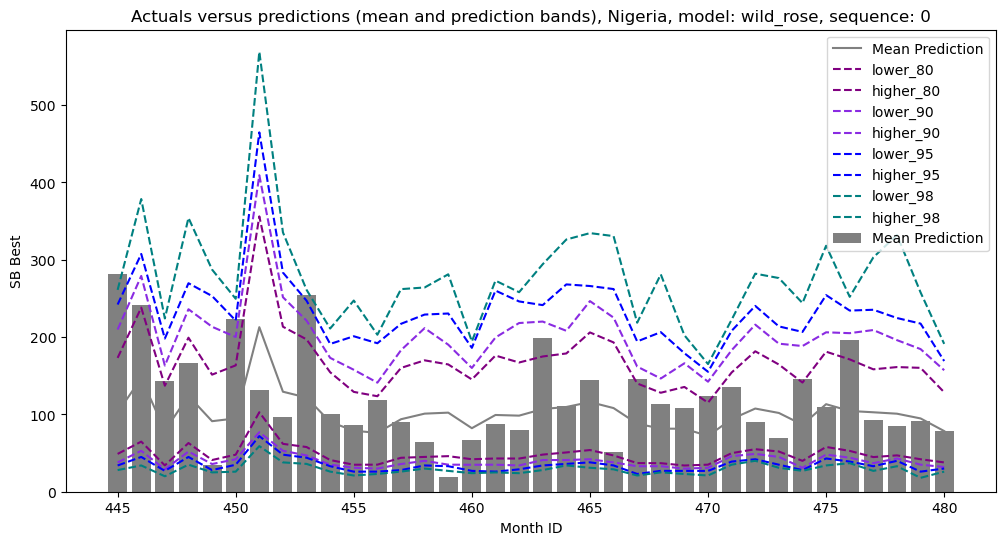

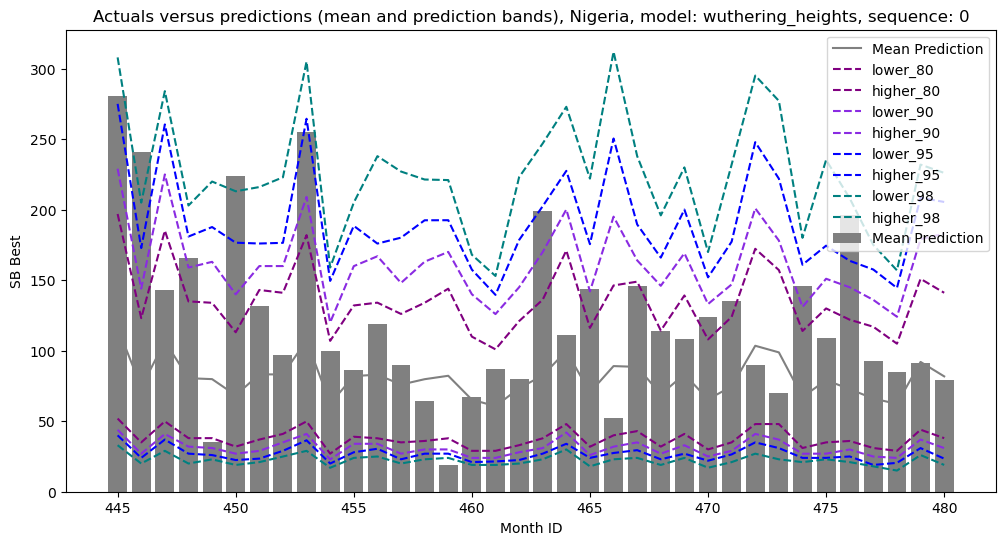

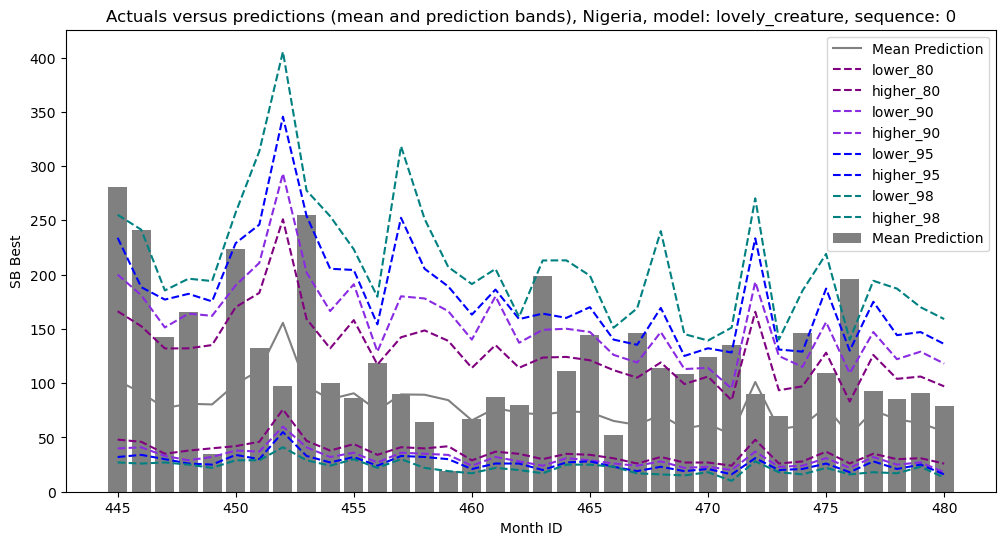

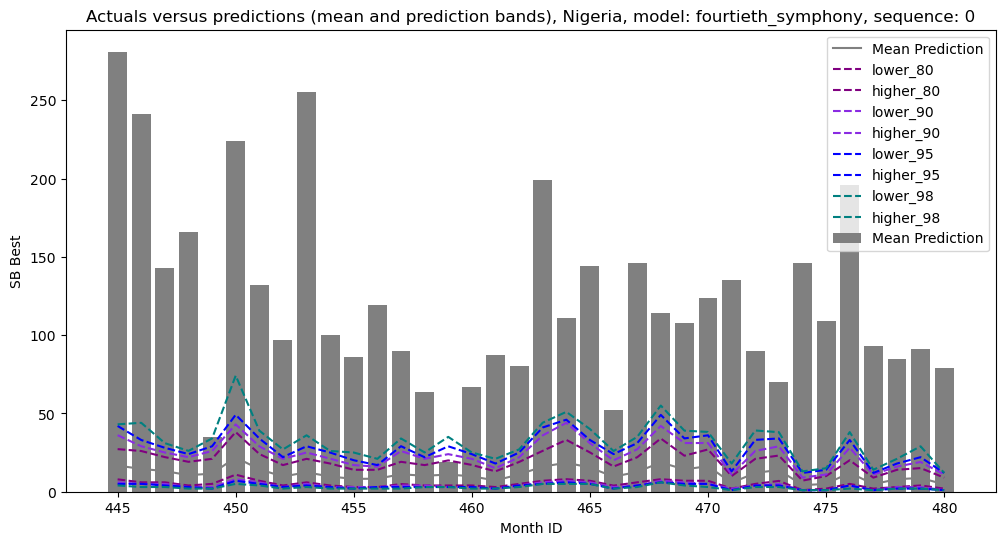

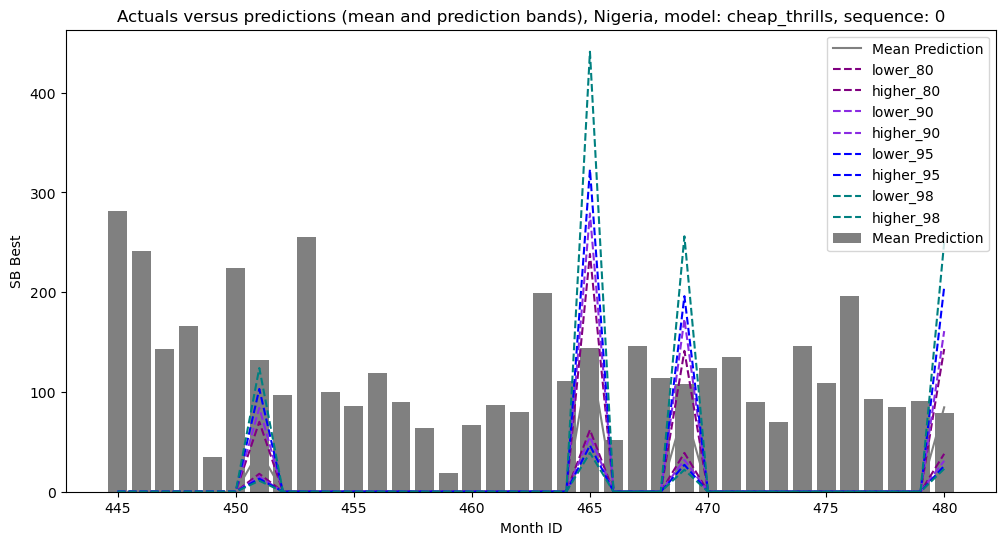

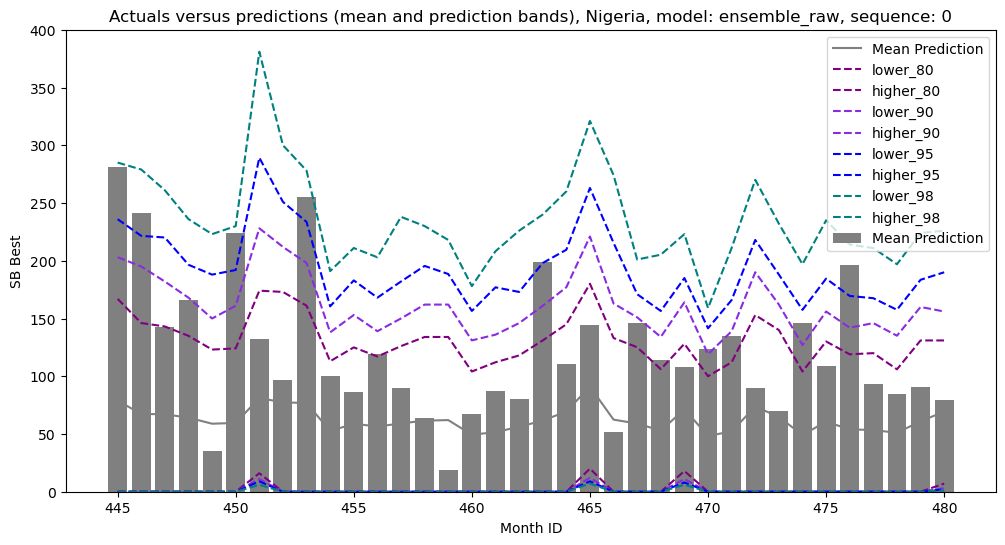

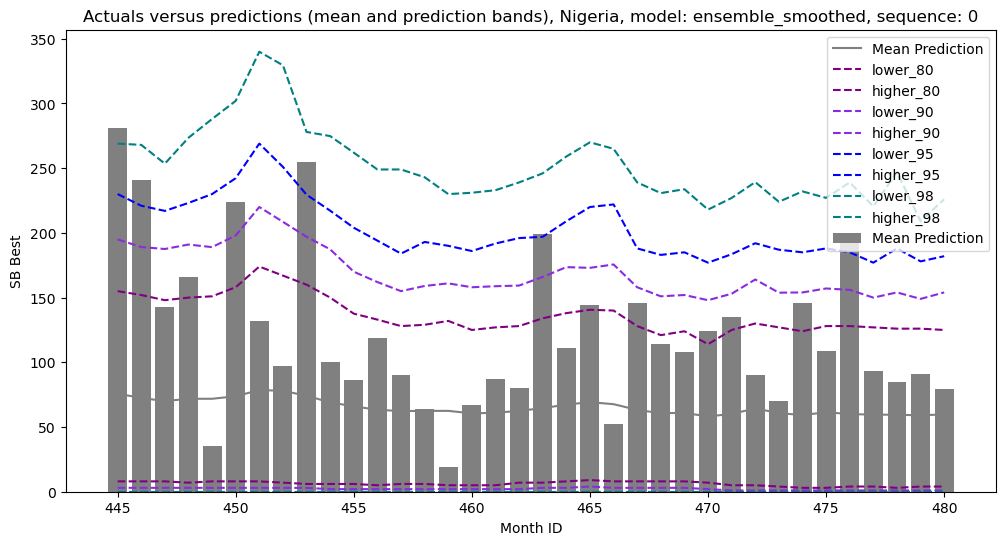

In [26]:
#Country line plots

import matplotlib.pyplot as plt
import seaborn as sns

def plot_with_bands(sequence, model, country_name, bands):
    df = model_list[model]['seq_data'][sequence]['df_w_actuals'].copy()
    df.reset_index(inplace=True)
    df_country = df.loc[df['country_name']==country_name] 
    plt.figure(figsize=(12, 6))
    alpha = 0.5
    plt.bar(df_country['month_id'],df_country['sb_best'],label='Mean Prediction', color = 'gray', linestyle='solid')
    plt.plot(df_country['month_id'],df_country['mean_pred'],label='Mean Prediction', color = 'gray', linestyle='solid')
    colors = ['purple', 'blueviolet', 'blue', 'teal', 'green','yellowgreen','yellow','gold','orange','darkorange','red','purple']
    for band in bands:
        colname = f'lower_{str(band)}'
        plt.plot(df_country['month_id'],df_country[colname],label=colname, color = colors[bands.index(band)], linestyle='dashed')
        colname = f'higher_{str(band)}'
        plt.plot(df_country['month_id'],df_country[colname],label=colname, color = colors[bands.index(band)], linestyle='dashed')
    #plt.bar(df['month_id'],df['sb_best'],alpha=alpha)
    plt.title(f'Actuals versus predictions (mean and prediction bands), {country_name}, model: {model_list[model]["name"]}, sequence: {sequence}')
    plt.xlabel('Month ID')
    plt.ylabel('SB Best')
    plt.legend()
    plt.show()
    
country_to_plot = 'Nigeria'
for model in range(len(model_list)):
    plot_with_bands(0, model, country_to_plot, [80, 90, 95, 98])


In [43]:
df_expanded.columns

Index(['pred_sb_best', 'smoothed_predictions', 'country_name', 'isonum',
       'isoab', 'sb_best', 'crps', 'percentiles', 'mean_pred', 'lower_80',
       'higher_80', 'coverage_80', 'winkler_80', 'mse', 'lower_90',
       'higher_90', 'coverage_90', 'winkler_90', 'lower_95', 'higher_95',
       'coverage_95', 'winkler_95', 'lower_98', 'higher_98', 'coverage_98',
       'winkler_98', 'fatality_categories', 'categories_mode', 'brier_1',
       'brier_10', 'brier_100', 'brier_1000', 'brier_10000', '0-1', '1-10',
       '10-100', '100-1000', '1000-10000'],
      dtype='object')

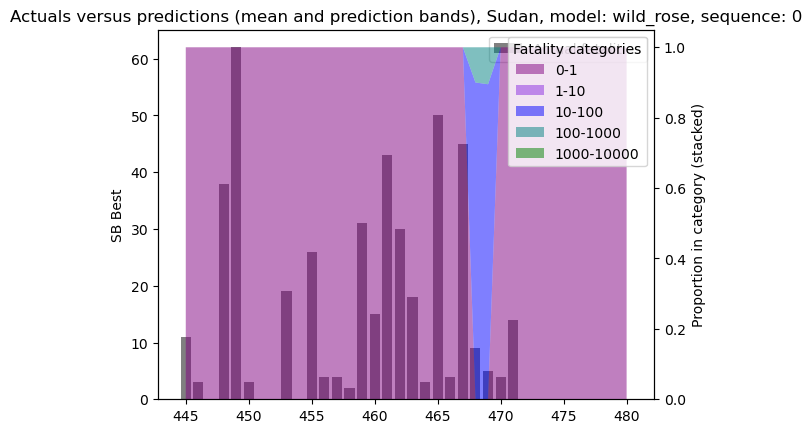

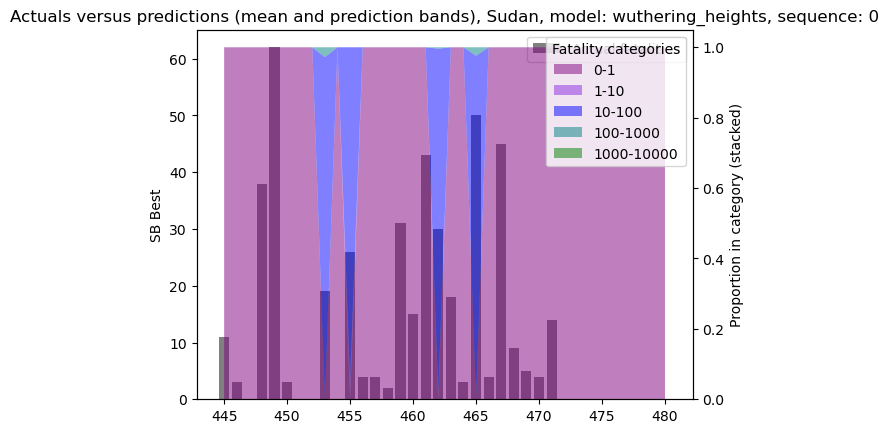

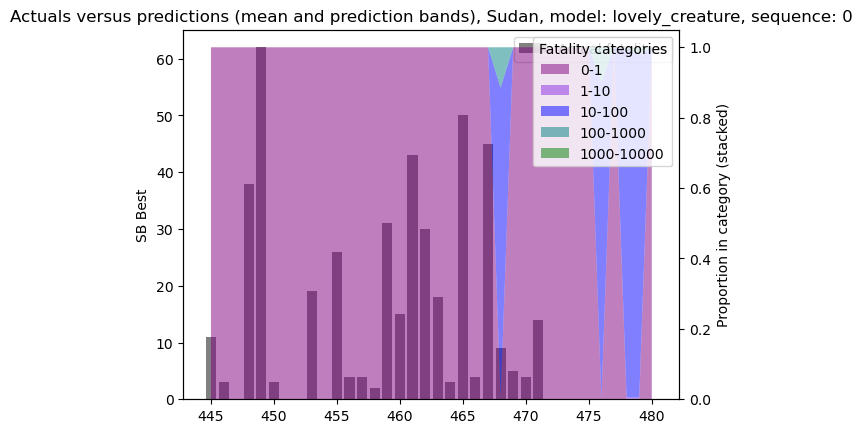

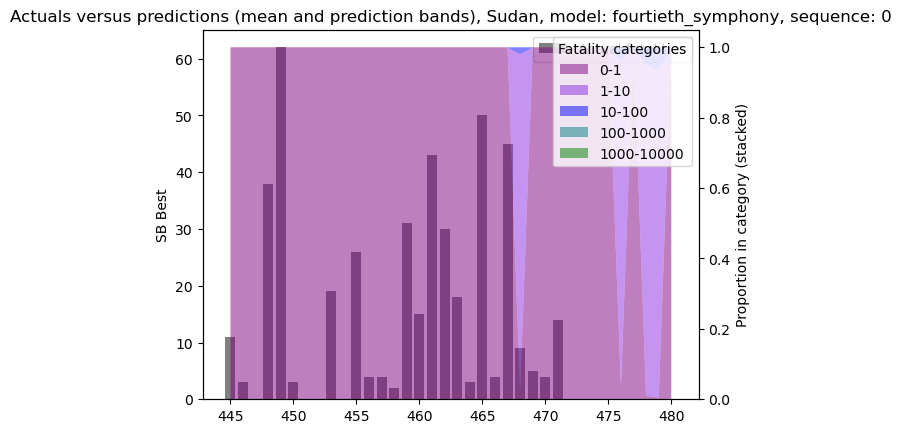

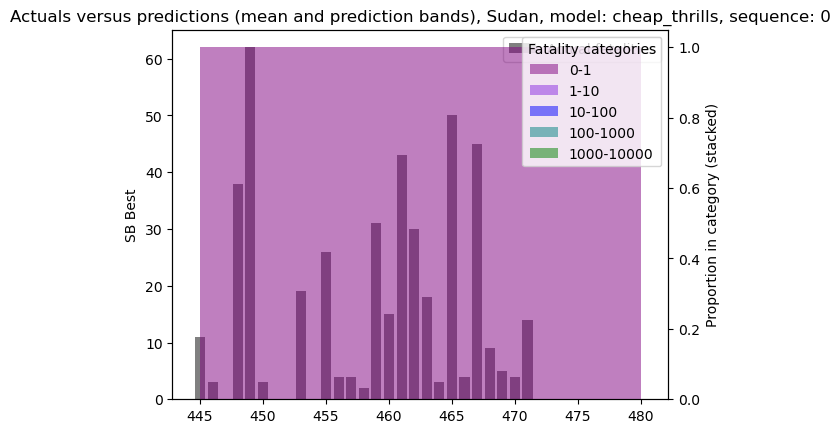

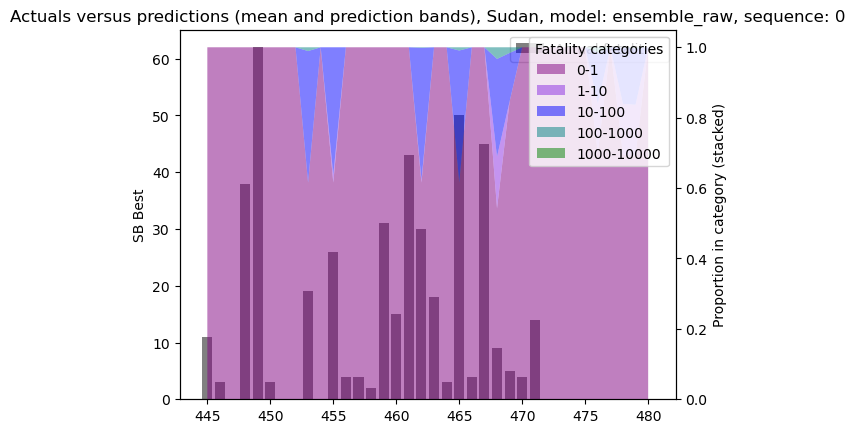

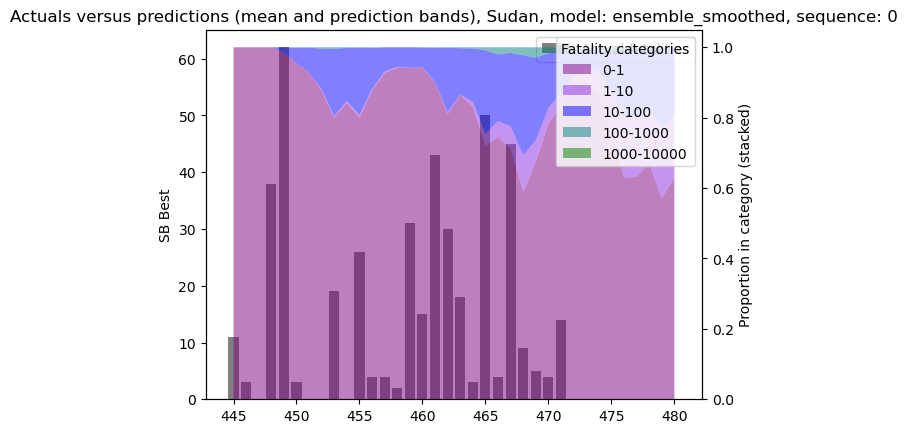

In [60]:
#df = model_list[0]['seq_data'][0]['df_w_actuals'].copy()

def extract_category(df):
    fatalities_df = df['fatality_categories']
    df_expanded = pd.DataFrame(fatalities_df.tolist(), index=fatalities_df.index)
    df_expanded.columns = ['0-1', '1-10', '10-100', '100-1000', '1000-10000']
    df_expanded = pd.concat([df, df_expanded], axis=1)
    return df_expanded
#df_expanded = extract_category(df)
#print(df.tail(10))
#print(df_expanded.tail(10))
def plot_categories(sequence, model, country_name, thresholds, stacked=False):
    
    df = model_list[model]['seq_data'][sequence]['df_w_actuals'].copy()
    df = extract_category(df)
    df.reset_index(inplace=True)
    df_country = df.loc[df['country_name']==country_name] 
#    plt.figure(figsize=(12, 6))
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    alpha = 0.5
    ax1.bar(df_country['month_id'],df_country['sb_best'],label='Actual fatalities', color = 'gray', linestyle='solid')
    ax1.set_ylabel('SB Best')
    ax1.legend()

    colors = ['purple', 'blueviolet', 'blue', 'teal', 'green','yellowgreen','yellow','gold','orange','darkorange','red','purple']
    if stacked:
        ax2.stackplot(df_country['month_id'], df_country[thresholds].T, labels=thresholds, colors=colors[0:len(thresholds)], alpha=0.5)
        ax2.set_ylabel('Proportion in category (stacked)')
    else:
        for t in thresholds:
            ax2.plot(df_country['month_id'],df_country[t],label=colname, color = colors[thresholds.index(t)], linestyle='dashed')
        ax2.set_ylabel('Proportion in category')
    ax2.legend(thresholds, title='Fatality categories', loc='upper right')
    plt.title(f'Actuals versus predictions (mean and prediction bands), {country_name}, model: {model_list[model]["name"]}, sequence: {sequence}')
    plt.xlabel('Month ID')
    plt.show()
    
country_to_plot = 'Sudan'
for model in range(len(model_list)):
    plot_categories(0, model, country_to_plot, ['0-1', '1-10','10-100', '100-1000', '1000-10000'], stacked=True)

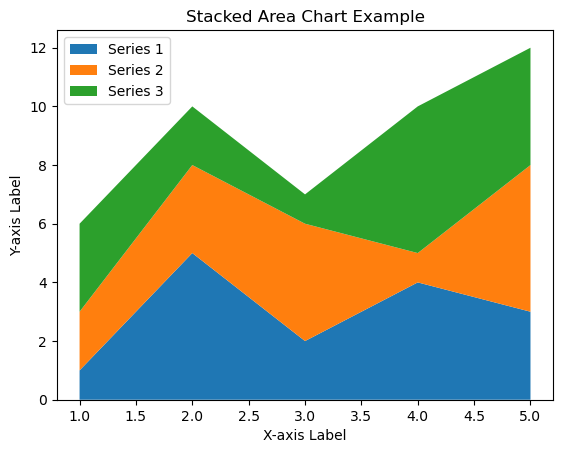

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.arange(1, 6)
y1 = np.array([1, 5, 2, 4, 3])
y2 = np.array([2, 3, 4, 1, 5])
y3 = np.array([3, 2, 1, 5, 4])

# Create the stacked area chart
plt.stackplot(x, y1, y2, y3, labels=['Series 1', 'Series 2', 'Series 3'])

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Stacked Area Chart Example')
plt.legend(loc='upper left')

# Display the chart
plt.show()

NameError: name 'country_name' is not defined

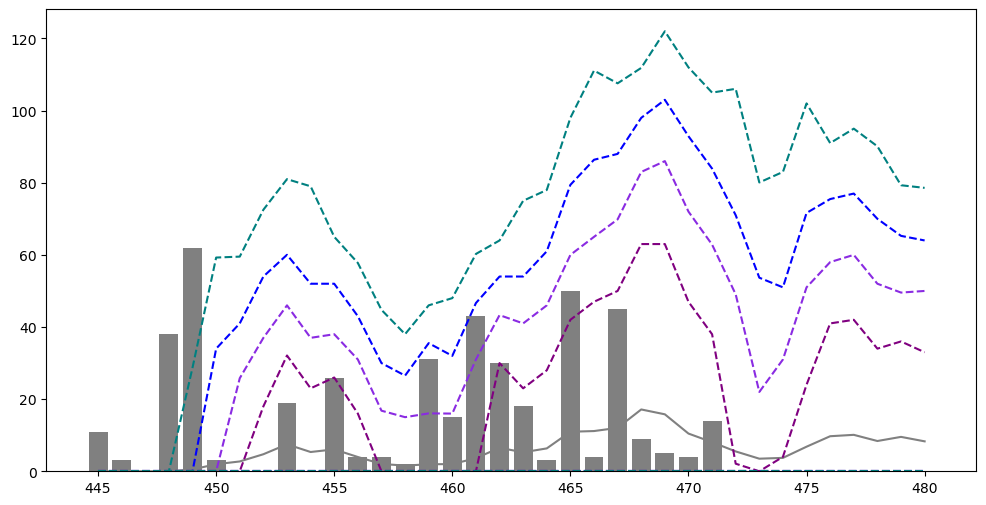

In [27]:

s = 0
plt.figure(figsize=(12, 6))
country_id = 246  # Example country_id
df = model_list[-1]['seq_data'][s]['df_w_actuals'].copy()
df.reset_index(inplace=True)
df_country = df.loc[df['country_name']=='Sudan'] 
#print(df_country.head())
alpha = 0.5
plt.bar(df_country['month_id'],df_country['sb_best'],label='Mean Prediction', color = 'gray', linestyle='solid')
plt.plot(df_country['month_id'],df_country['mean_pred'],label='Mean Prediction', color = 'gray', linestyle='solid')
colors = ['purple','blueviolet','blue','teal', 'green','yellowgreen','yellow','gold','orange','darkorange','red','purple']
for band in bands:
    colname = f'lower_{str(band)}'
    plt.plot(df_country['month_id'],df_country[colname],label=colname, color = colors[bands.index(band)], linestyle='dashed')
    colname = f'higher_{str(band)}'
    plt.plot(df_country['month_id'],df_country[colname],label=colname, color = colors[bands.index(band)], linestyle='dashed')
#plt.bar(df['month_id'],df['sb_best'],alpha=alpha)
plt.title(f'Actuals versus predictions (mean and prediction bands), {country_name}')
plt.xlabel('Month ID')
plt.ylabel('SB Best')
plt.legend()
plt.show()


In [ ]:
model_list[-1]['seq_data'][0]['df_w_actuals']

In [ ]:
df.loc[(slice(None), 246), :] 